In [24]:
#Imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Read in Data
### Predicted variable: is_open

In [25]:
# Read data
df = pd.read_csv('https://yelp-business-bucket.s3.amazonaws.com/originalTrain.csv')

# Drop any row containing NAs
df = df.dropna()
df

,parking_garage,parking_lot,parking_street,parking_valet,parking_validated,reservations,delivery,takeout,kidsfriendly,acceptcreditcard,...,price_3,price_4,review_37,review_82,review_184,review_max,density_8,density_18,density_38,density_274
0,0,1,0,0,0,0.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,...,0,1,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20839,0,0,0,0,0,0.0,0.0,1.0,1.0,1.0,...,0,0,0,0,0,1,1,0,0,0
20840,0,1,0,0,0,0.0,1.0,1.0,1.0,1.0,...,0,0,0,0,1,0,0,0,1,0
20841,0,0,1,0,0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,1
20842,0,1,0,0,0,0.0,1.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,0


In [26]:
# Set all columns except 'is_open' as predictor variables.  'is_open' will be the predicted value.
X = df.drop('is_open',axis=1)
y = df['is_open']

In [27]:
#train_test_split X and y
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Final features in dataset are below.  Other iterations we tried in order to improve the log_reg and RF score included:
1. Not taking into account restaurant density within 0.5mi radius
2. Consolidating the different parking types (garage, lot, street) into one "is_there_parking" feature
3. Dropping all fields except: alcohol, wifi, stars, review counts, density
4. Dropping the 'parking_validated' feature as it had the least importance.
5. Training on just US cities while excluding CA cities.
6. Looking at just restaurants in Nevada

In [28]:
#Preview training set
for x in X_train.columns:
    print (x)

parking_garage
parking_lot
parking_street
parking_valet
parking_validated
reservations
delivery
takeout
kidsfriendly
acceptcreditcard
outdoorseating
goodForGroups
alcohol
wifi
star_1
star_1.5
star_2.0
star_2.5
star_3.0
star_3.5
star_4.0
star_4.5
star_5.0
price_1
price_2
price_3
price_4
review_37
review_82
review_184
review_max
density_8
density_18
density_38
density_274


# 2a. Logistic Regression

In [29]:
# Perform logistic regression on training set
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Log Reg Score of Test set
log_reg.score(X_test,y_test)

0.7794932699920823

# 2b. Random Forest Classifier

In [31]:
#Run random forest classifier, fit and score
rf = RandomForestClassifier()
rf.fit(X,y)
rf.score(X,y)

0.8958776661552927

# 3. Feature Importance

In [56]:
model_features = [x for x in zip(rf.feature_importances_, X.columns)]
model_features

[(0.027090677163586575, 'parking_garage'),
 (0.07530927055888745, 'parking_lot'),
 (0.05797922528979503, 'parking_street'),
 (0.017174126448425964, 'parking_valet'),
 (0.005705104592414462, 'parking_validated'),
 (0.04438902194829107, 'reservations'),
 (0.06362356855088451, 'delivery'),
 (0.019106309710764956, 'takeout'),
 (0.040956260254002036, 'kidsfriendly'),
 (0.011967520809840801, 'acceptcreditcard'),
 (0.08056724160892367, 'outdoorseating'),
 (0.03554620697319492, 'goodForGroups'),
 (0.04999028011057553, 'alcohol'),
 (0.07674814201851346, 'wifi'),
 (0.0012385167124881542, 'star_1'),
 (0.004498129007181191, 'star_1.5'),
 (0.010599451766645004, 'star_2.0'),
 (0.0193792328027865, 'star_2.5'),
 (0.02733716303312429, 'star_3.0'),
 (0.029475506200752878, 'star_3.5'),
 (0.028763335780808873, 'star_4.0'),
 (0.023580947114543217, 'star_4.5'),
 (0.006170519149647015, 'star_5.0'),
 (0.02002699032593261, 'price_1'),
 (0.017309088434935446, 'price_2'),
 (0.00619665857628638, 'price_3'),
 (0.0028910510663182733, 'price_4'),
 (0.03141041141897883, 'review_37'),
 (0.0313015058122139, 'review_82'),
 (0.017883180183301893, 'review_184'),
 (0.024991464447212335, 'review_max'),
 (0.022623826927912295, 'density_8'),
 (0.023289064676163408, 'density_18'),
 (0.022088703396676092, 'density_38'),
 (0.022792297127990992, 'density_274')]

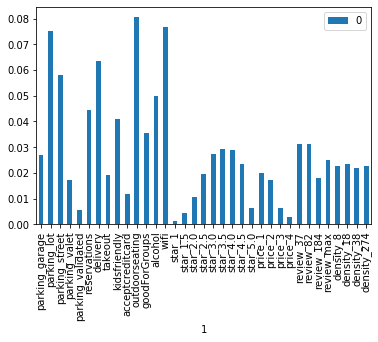

In [49]:
#Bar chart of feature importances

pd.DataFrame([x for x in zip(rf.feature_importances_, X.columns)]).plot(kind='bar', x=1,y=0)

# 4. Correlation Heatmap

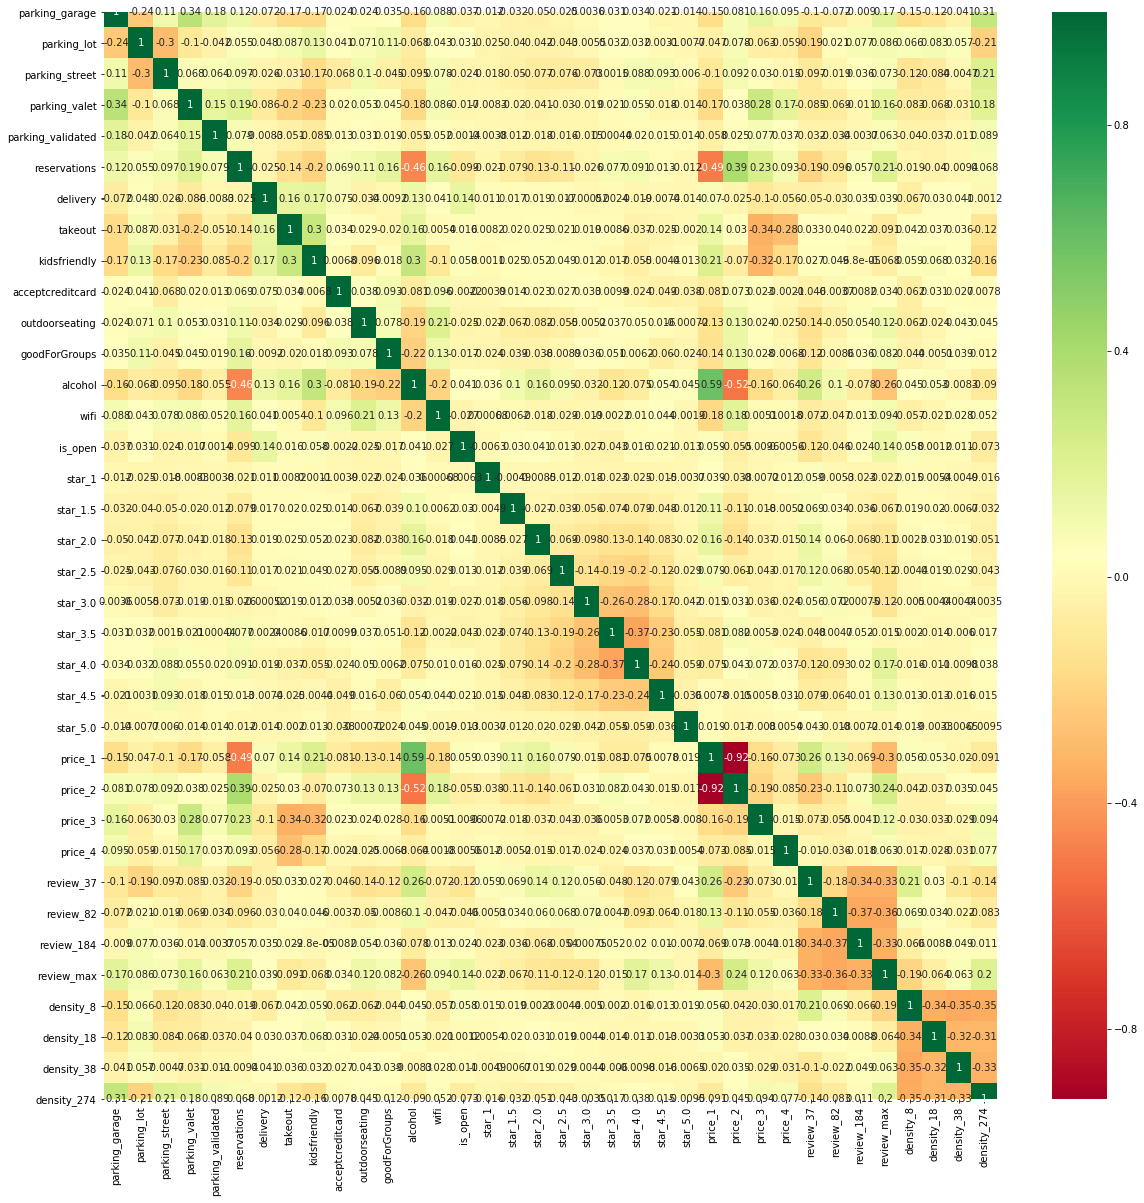

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop('is_open', axis=1) #independent columns
y = df['is_open'] #target column i.e price range

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [64]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)

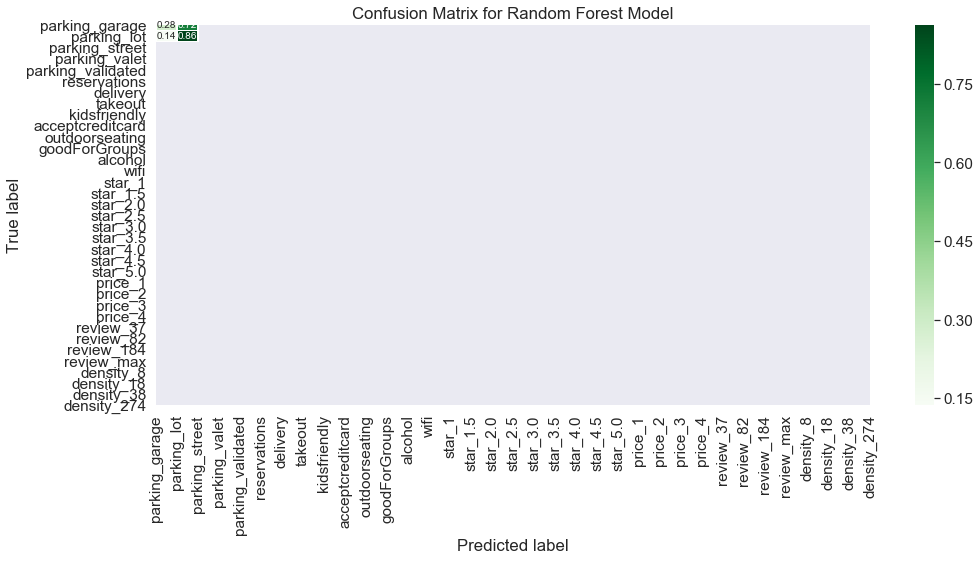

In [78]:


# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['parking_garage',
'parking_lot',
'parking_street',
'parking_valet',
'parking_validated',
'reservations',
'delivery',
'takeout',
'kidsfriendly',
'acceptcreditcard',
'outdoorseating',
'goodForGroups',
'alcohol',
'wifi',
'star_1',
'star_1.5',
'star_2.0',
'star_2.5',
'star_3.0',
'star_3.5',
'star_4.0',
'star_4.5',
'star_5.0',
'price_1',
'price_2',
'price_3',
'price_4',
'review_37',
'review_82',
'review_184',
'review_max',
'density_8',
'density_18',
'density_38',
'density_274']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# new colormap for ICE plot
cmap2 = plt.get_cmap('OrRd')
# set color_by to Wt, in order to color each curve by that player's weight
ice_plot(df, linewidth=0.5, color_by='Wt', cmap=cmap2)
# ice_plot doesn't return a colorbar so we have to add one
# hack to add in colorbar taken from here:
# https://stackoverflow.com/questions/8342549/matplotlib-add-colorbar-to-a-sequence-of-line-plots/11558629#11558629
wt_vals = forty_ice_df.columns.get_level_values('Wt').values
sm = plt.cm.ScalarMappable(cmap=cmap2, 
                           norm=plt.Normalize(vmin=wt_vals.min(), 
                                              vmax=wt_vals.max()))
# need to create fake array for the scalar mappable or else we get an error
sm._A = []
plt.colorbar(sm, label='Wt')
plt.ylabel('Pred. AV %ile')
plt.xlabel('Forty');

In [35]:
! pip install pdpbox

# Other models

In [42]:
# Build Models - Spot Check Algorithms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [44]:
models = []
models.append(('Logistic Regression (LR)          ', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Linear Discriminant Analysis (LDA)', LinearDiscriminantAnalysis()))
models.append(('K-Nearest Neighbors (KNN)         ', KNeighborsClassifier()))
models.append(('Classification and Regression Trees (CART)', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes (NB)  ', GaussianNB()))
models.append(('Support Vector Machines (SVM)     ', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

Logistic Regression (LR)          : 0.779586 (0.005456)
Linear Discriminant Analysis (LDA): 0.780019 (0.006298)
K-Nearest Neighbors (KNN)         : 0.759109 (0.006370)
Classification and Regression Trees (CART): 0.697497 (0.013475)
Gaussian Naive Bayes (NB)  : 0.717847 (0.010196)
Support Vector Machines (SVM)     : 0.775441 (0.000069)


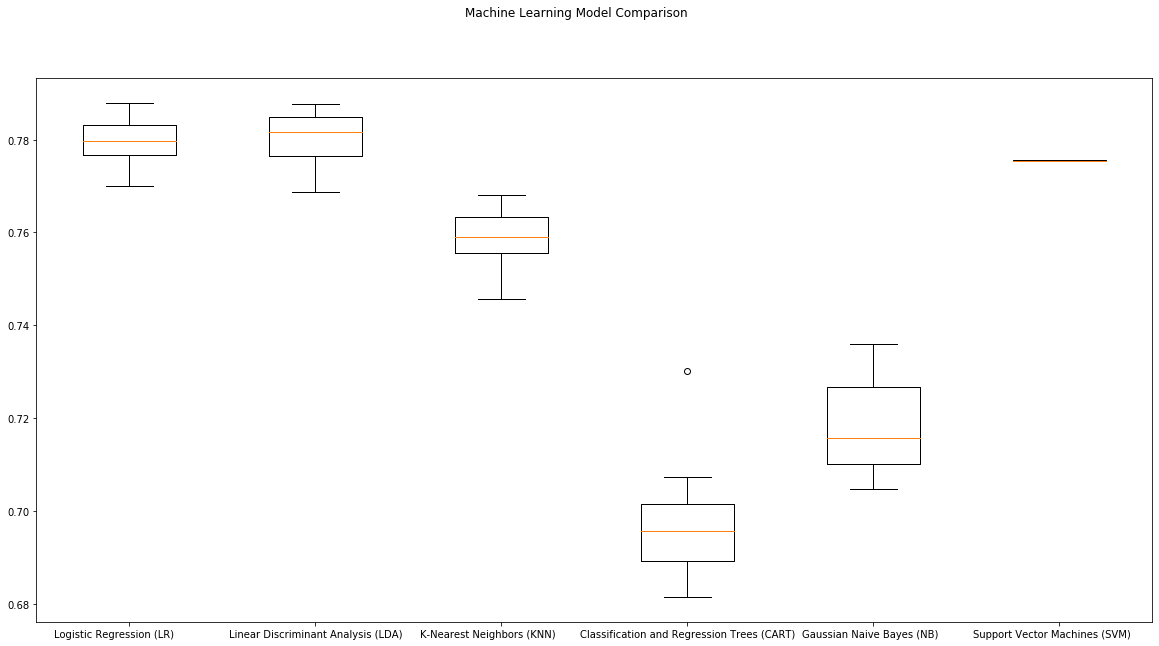

In [48]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Future Direction

- Map of currently open restaurants with prediction of whether or not it will be open in the future given its Yelp attributes.
- Incorporate detailed look at reviews in the model -- look for key words to perform sentiment analysis (i.e. patrons liked, loved, disliked, or hated this restaurant)
- Determine likelihood of being open within a certain future timeframe (in 1 month, 6 months, 1 year, 2 years, 5 years).  This would involve delving into historical Yelp data, looking at dates of reviews, etc.
